In [1]:
import nltk
import pandas as pd
import numpy as np
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/aalibes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aalibes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aalibes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
#NLTK test
with open('UN-GD-GA/2020/Niger.txt', 'r') as f:
    text_raw = f.read()

In [65]:
text_raw = text_raw.replace('.', '. ')

In [66]:
text_raw

'Address by Mr.  Mahamadou Issoufou, President of the Republic of the Niger\n\nMr.  President, Excellencies Heads of State and Government,Ladies and Gentlemen Heads of Delegations, Ladies, Gentlemen,\nAt the outset, Mr.  President, I should like to extend my warm congratulations to you on your election as President of this 75th session of the United Nations General Assembly.  I have no doubt that your personal attributes, your long and rich experience and your leadership constitute important assets that will enable the General Assembly to  make  progress  in  fulfilling  the  mandate  entrusted  to  it  by  member  States.   I  can  assure you of the Niger’s readiness to provide you with all of the support you require in carrying out your duties. I  would  also  like  to  pay  a  deserved  tribute  to  the  outgoing  president,  Mr.   Tijjani Muhammad Bande, for his leadership in steering the 74th session, which was marked, as we all know, by the unprecedented COVID-19 pandemic situati

In [67]:
text_tokens = nltk.word_tokenize(text_raw)
sentence_tokens = nltk.sent_tokenize(text_raw)
text1 = nltk.Text(text_tokens)

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  
text_filtered = [w for w in text_tokens if not w.lower() in stop_words] 

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w,'v') for w in text_filtered]

In [ ]:
lemmatized

In [68]:
from transformers import pipeline
import ipywidgets as widgets
# source https://towardsdatascience.com/sentiment-analysis-of-political-speeches-using-hugging-faces-pipeline-feature-3109c121d351
# https://github.com/chuachinhon/practical_nlp/blob/master/notebooks/1.0_speech_sentiment_cch.ipynb

In [69]:

# For the demo here, we'll just run the analysis for 1 speech
# First speech is by PM Lee on June 7. Let's break it down by paragraphs

pm = pd.DataFrame(sentence_tokens,columns=["text"])
pm.shape

(149, 1)

In [70]:
corpus = list(pm['text'].values)

In [71]:
nlp_sentiment = pipeline("sentiment-analysis")

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertModel: ['dropout_19', 'pre_classifier', 'classifier']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Some layers from the model checkpoint at distilbert-b

In [72]:
%%time

pm["Sentiment"] = nlp_sentiment(corpus)

CPU times: user 35.7 s, sys: 7.58 s, total: 43.3 s
Wall time: 12.9 s


In [73]:
pm['Sentiment_Label'] = [x.get('label') for x in pm['Sentiment']]

pm['Sentiment_Score'] = [x.get('score') for x in pm['Sentiment']]

In [74]:
pm.head(100)
pm['Sentiment_Label'].value_counts()

POSITIVE    112
NEGATIVE     37
Name: Sentiment_Label, dtype: int64

In [75]:
# Tweaking the sentiment score column for visualisation
# Absolute value of the score is unchanged, merely the direction so that
# the resulting chart is clearer on a divergent axis

pm["Sentiment_Score"] = np.where(
    pm["Sentiment_Label"] == "NEGATIVE", -(pm["Sentiment_Score"]), pm["Sentiment_Score"])

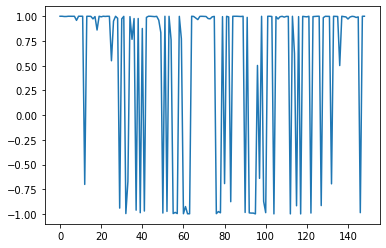

In [76]:
pm["Sentiment_Score"].plot()

In [77]:
np.average(pm["Sentiment_Score"])

0.4956006775766411

In [78]:
import plotly
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import kaleido

In [79]:
# I experimented with various plots and settled on Plotly's Heatmap
df = pm


fig = go.Figure(
    data=go.Heatmap(
        z=df["Sentiment_Score"],
        x=df.index,
        y=df["Sentiment_Label"],
        colorscale=px.colors.sequential.RdBu,
    )
)

fig.update_layout(
    title=go.layout.Title(text="Niger president speech 2020"),
    autosize=False,
    width=1200,
    height=600,
)

fig.update_layout(yaxis_autorange = "reversed")

fig.show()
fig.to_image(format="png", engine="kaleido")

fig.write_image("Niger2020.png")


In [80]:
pm[pm.Sentiment_Score<0]

,text,Sentiment,Sentiment_Label,Sentiment_Score
12,That is why I take this opportunity to ...,"{'label': 'NEGATIVE', 'score': 0.7013534307479...",NEGATIVE,-0.701353
29,Democratic governance must be better refl...,"{'label': 'NEGATIVE', 'score': 0.9408290386199...",NEGATIVE,-0.940829
32,We need to build confidence.,"{'label': 'NEGATIVE', 'score': 0.9961594343185...",NEGATIVE,-0.996159
33,We need to develop inclusion and transparency.,"{'label': 'NEGATIVE', 'score': 0.670411229133606}",NEGATIVE,-0.670411
37,"Key elements are already being implemented, su...","{'label': 'NEGATIVE', 'score': 0.9618145823478...",NEGATIVE,-0.961815
39,COVID-19 is putting great strain on our health...,"{'label': 'NEGATIVE', 'score': 0.9874634146690...",NEGATIVE,-0.987463
41,Here I would like to reiterate my call for vac...,"{'label': 'NEGATIVE', 'score': 0.9705233573913...",NEGATIVE,-0.970523
50,The coronavirus pandemic reminds us that the g...,"{'label': 'NEGATIVE', 'score': 0.9907577633857...",NEGATIVE,-0.990758
52,Defeating COVID-19 means including Africa in t...,"{'label': 'NEGATIVE', 'score': 0.9741050601005...",NEGATIVE,-0.974105
55,A simple moratorium on the debt will not be en...,"{'label': 'NEGATIVE', 'score': 0.996084451675415}",NEGATIVE,-0.996084


In [83]:
pm.loc[100]["text"]

'A follow-up mechanism must be put in place for the disclosure of information and the implementation of sanctions related to attacks against humanitarian workers.'

In [85]:
pipeline('sentiment-analysis')('I hate each and everyone of you')

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertModel: ['dropout_19', 'pre_classifier', 'classifier']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Some layers from the model checkpoint at distilbert-b

[{'label': 'NEGATIVE', 'score': 0.9989160895347595}]